In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [25]:
class AutoEDA:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def read_data(self): # read data file
        while True:
            dtype = input("Enter the data type csv or excel ").lower()
            
            if dtype not in ['csv', 'excel']:
                print("Unsupported data type")
                continue
            
            dpath = input("Enter the path to the data file: ")
            
            try:
                if dtype == 'csv':
                    data = pd.read_csv(dpath)
                elif data_type == 'excel':
                    data = pd.read_excel(dpath)
            except FileNotFoundError:
                print("File not found")
                continue
            
            
            return data

    def handle_missing_values(self, inplace=True): #handle missing data
        while True:
            method = input("Enter the method to handle missing values mean or median or drop ").lower()

            if method not in ['mean', 'median', 'drop']:
                print("Invalid method")
                continue

            
            df = self.dataframe if inplace else self.dataframe.copy()

            if method == 'mean':
                    df.fillna(df.mean(), inplace=True)
            elif method == 'median':
                    df.fillna(df.median(), inplace=True)
            elif method == 'drop':
                    df.dropna(inplace=True)

            print("Missing values handled successfully.")
            return df
    
    def boxplot(self):
        df = self.dataframe

        while True:
            column = input("Enter the column to show boxplot visualization: ")

            if column not in df.columns:
                print(f"Column '{column}' not found in the DataFrame.")
                continue

            try:
                plt.figure(figsize=(8, 6))
                plt.boxplot(df[column], vert=True)
                plt.title(f"Box Plot of {column}")
                plt.xlabel(column)
                plt.ylabel("Values")
                plt.show()
                break  # Exit the loop if visualization is successful
            except Exception as e:
                print(f"An error occurred: {e}")

                
    def barchart(self):
        df = self.dataframe
        
        while True : 
            x_column = input("Enter the first column: ")
            y_column = input("Enter the second column: ")
        
            if x_column not in df.columns:
                print(f"Column '{x_column}' not found in the DataFrame.")
                continue

            if y_column not in df.columns:
                print(f"Column '{y_column}' not found in the DataFrame.")
                continue
          
            plt.figure(figsize=(8, 6))
            plt.bar(df[x_column], df[y_column])
            plt.title(f"Bar Chart of {y_column} vs. {x_column}")
            plt.xlabel(x_column)
            plt.ylabel(y_column)
            plt.show()
            break  

    def scatter(self):
        df = self.dataframe

        while True : 
            x_column = input("Enter the first column: ")
            y_column = input("Enter the second column: ")
        
            if x_column not in df.columns:
                print(f"Column '{x_column}' not found ")
                continue

            if y_column not in df.columns:
                print(f"Column '{y_column}' not found")
                continue

           
            plt.figure(figsize=(8, 6))
            plt.scatter(df[x_column], df[y_column], c='blue', alpha=0.5, s=30)
            plt.title(f"Scatter Plot of {y_column} vs. {x_column}")
            plt.xlabel(x_column)
            plt.ylabel(y_column)
            plt.grid(True)
            plt.show()
            break  

        
        
 

In [5]:
eda_tool = AutoEDA(dataframe=None)
loaded_data = eda_tool.read_data()
print("Loaded Data:")
loaded_data.head()

Enter the data type csv or excel csv
Enter the path to the data file: International_Report_Passengers.csv
Loaded Data:


,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683
2,12/01/2005,2005,12,11433,DTW,43,10411,AUA,277,20344,RD,1,Passengers,0,1010,1010
3,04/01/2003,2003,4,13487,MSP,63,16304,ZIH,148,20204,MG,1,Passengers,0,508,508
4,12/01/2005,2005,12,12016,GUM,5,11138,CRK,766,20312,TZ,1,Passengers,0,76,76


In [6]:
print('Description of data is:')
loaded_data.describe()

Description of data is:


,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000
mean,2006.141110,6.366576,12779.103825,44.394527,13493.331869,468.122264,20031.610461,0.562233,6478.893801,196.740288,6675.634089
std,8.716122,3.466745,2510.939346,28.110753,1955.917890,292.799407,510.270976,0.496112,8622.704655,954.759814,8532.400269
min,1990.000000,1.000000,10010.000000,1.000000,10125.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,1999.000000,3.000000,11618.000000,22.000000,11760.000000,204.000000,19623.000000,0.000000,142.000000,0.000000,633.000000
50%,2007.000000,6.000000,12889.000000,33.000000,13408.000000,429.000000,19917.000000,1.000000,3561.000000,0.000000,3803.000000
75%,2014.000000,9.000000,13796.000000,74.000000,15092.000000,736.000000,20312.000000,1.000000,9700.000000,0.000000,9761.000000
max,2020.000000,12.000000,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,149898.000000,58284.000000,150195.000000


In [7]:
print('Missing values in data are:')
loaded_data.isna().sum()

Missing values in data are:


data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         2797
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [9]:
auto_eda = AutoEDA(loaded_data)
handled_data = auto_eda.handle_missing_values()
handled_data.isna().sum()

Enter the method to handle missing values mean or median or drop drop
Missing values handled successfully.


data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carrier         0
carriergroup    0
type            0
Scheduled       0
Charter         0
Total           0
dtype: int64

Enter the column to show boxplot visualization: Total


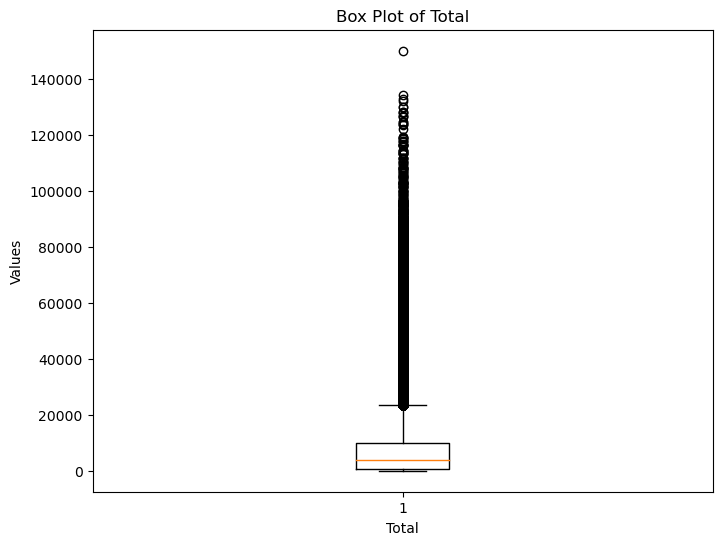

In [15]:
auto_eda = AutoEDA(handled_data)
auto_eda.boxplot()

Enter the first column: carrier
Enter the second column: Total


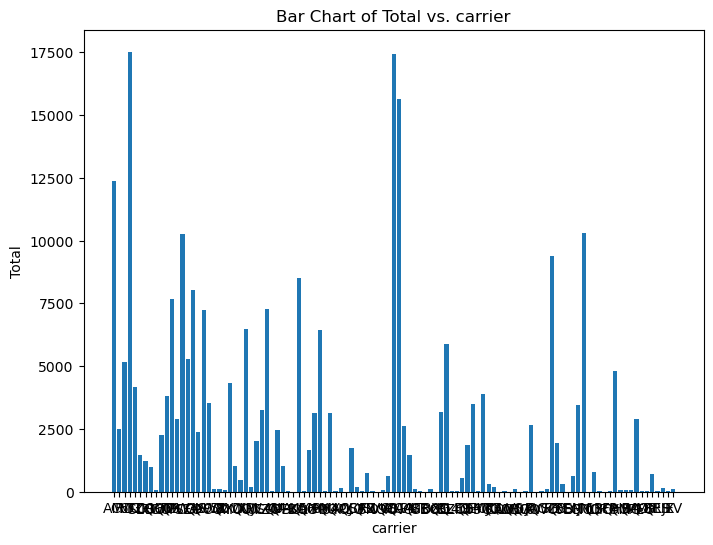

In [17]:
auto_eda = AutoEDA(handled_data[0:1000])
auto_eda.barchart()

Enter the first column: carrier
Enter the second column: Total


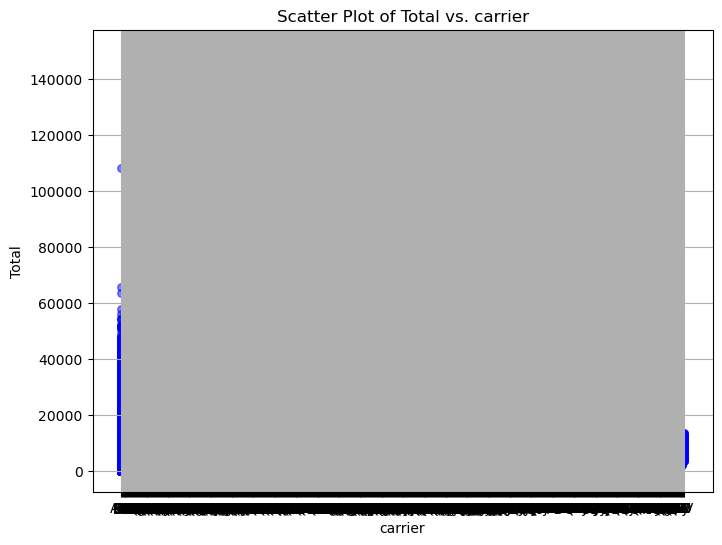

In [29]:
auto_eda = AutoEDA(handled_data)
auto_eda.scatter()